In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

data_train=pd.read_csv('house_train.csv')
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


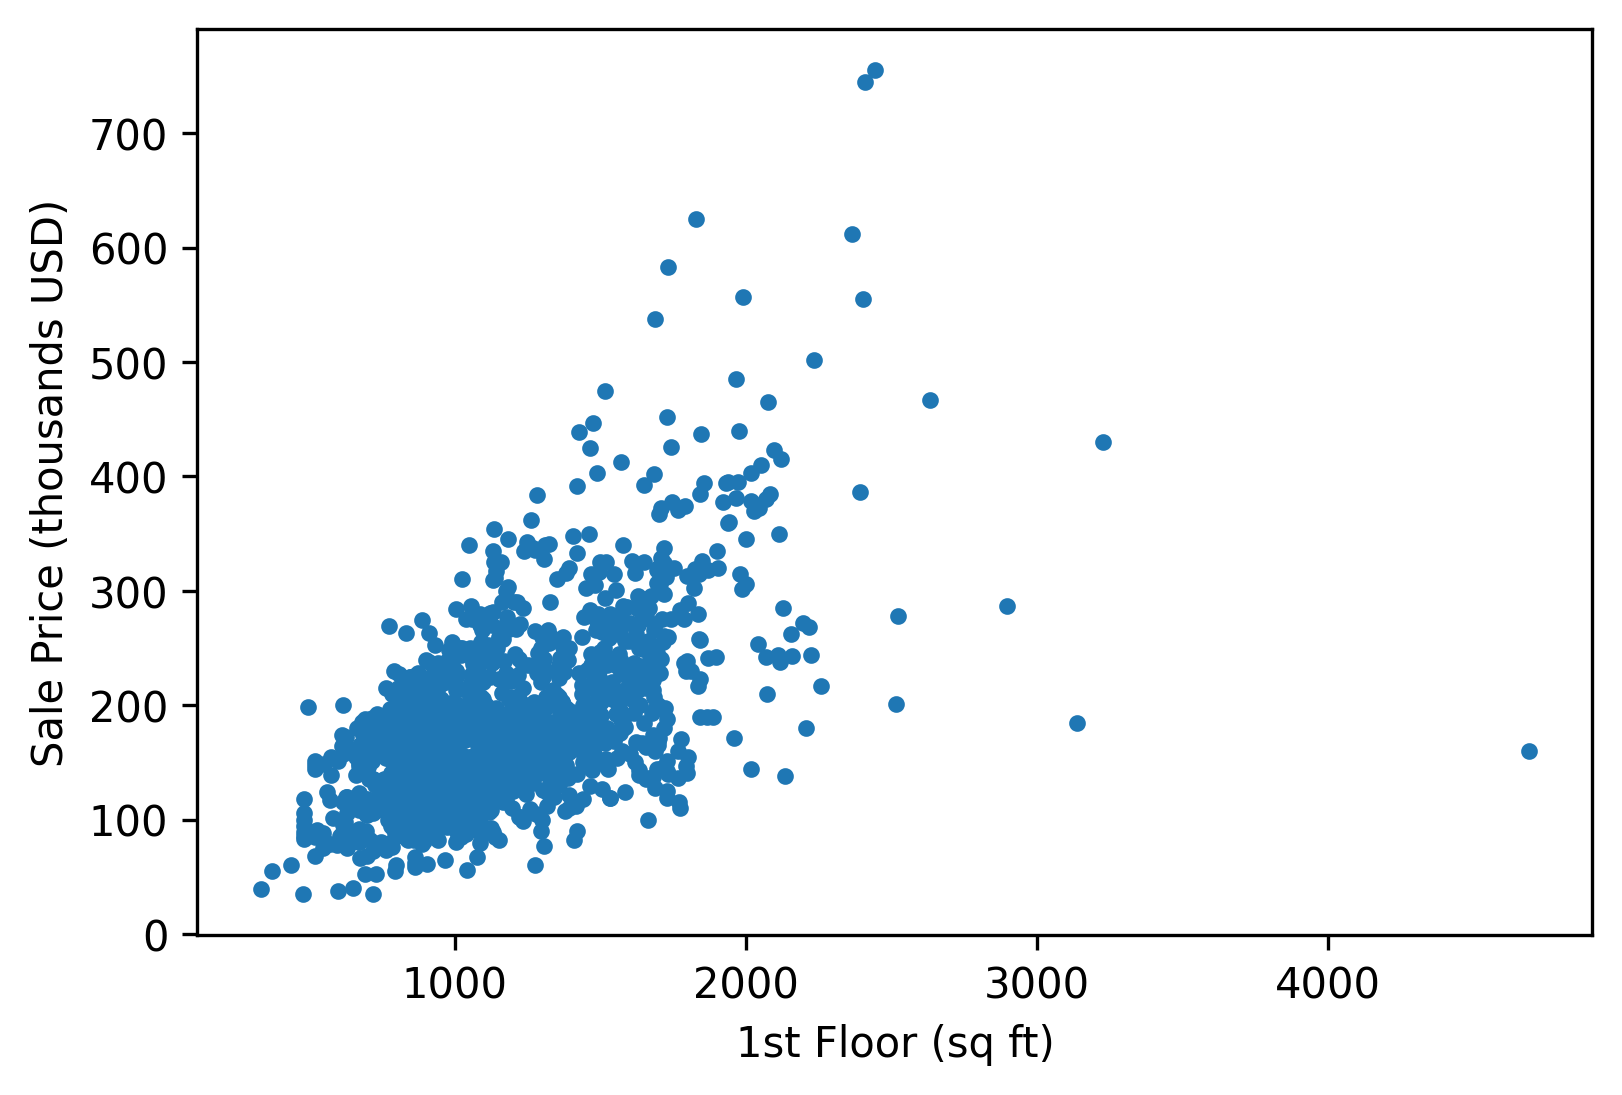

In [8]:
var='1stFlrSF'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
#data.plot.scatter(x=var, y='saleprice', ylim=(0,800000));

plt.figure(dpi=300)
plt.plot(data['1stFlrSF'],np.divide(data['SalePrice'], 1000), '.')
plt.xlabel('1st Floor (sq ft)')
plt.ylabel('Sale Price (thousands USD)')
plt.savefig("house_price_1stFlrSF.png")

(1460,) (1460,)


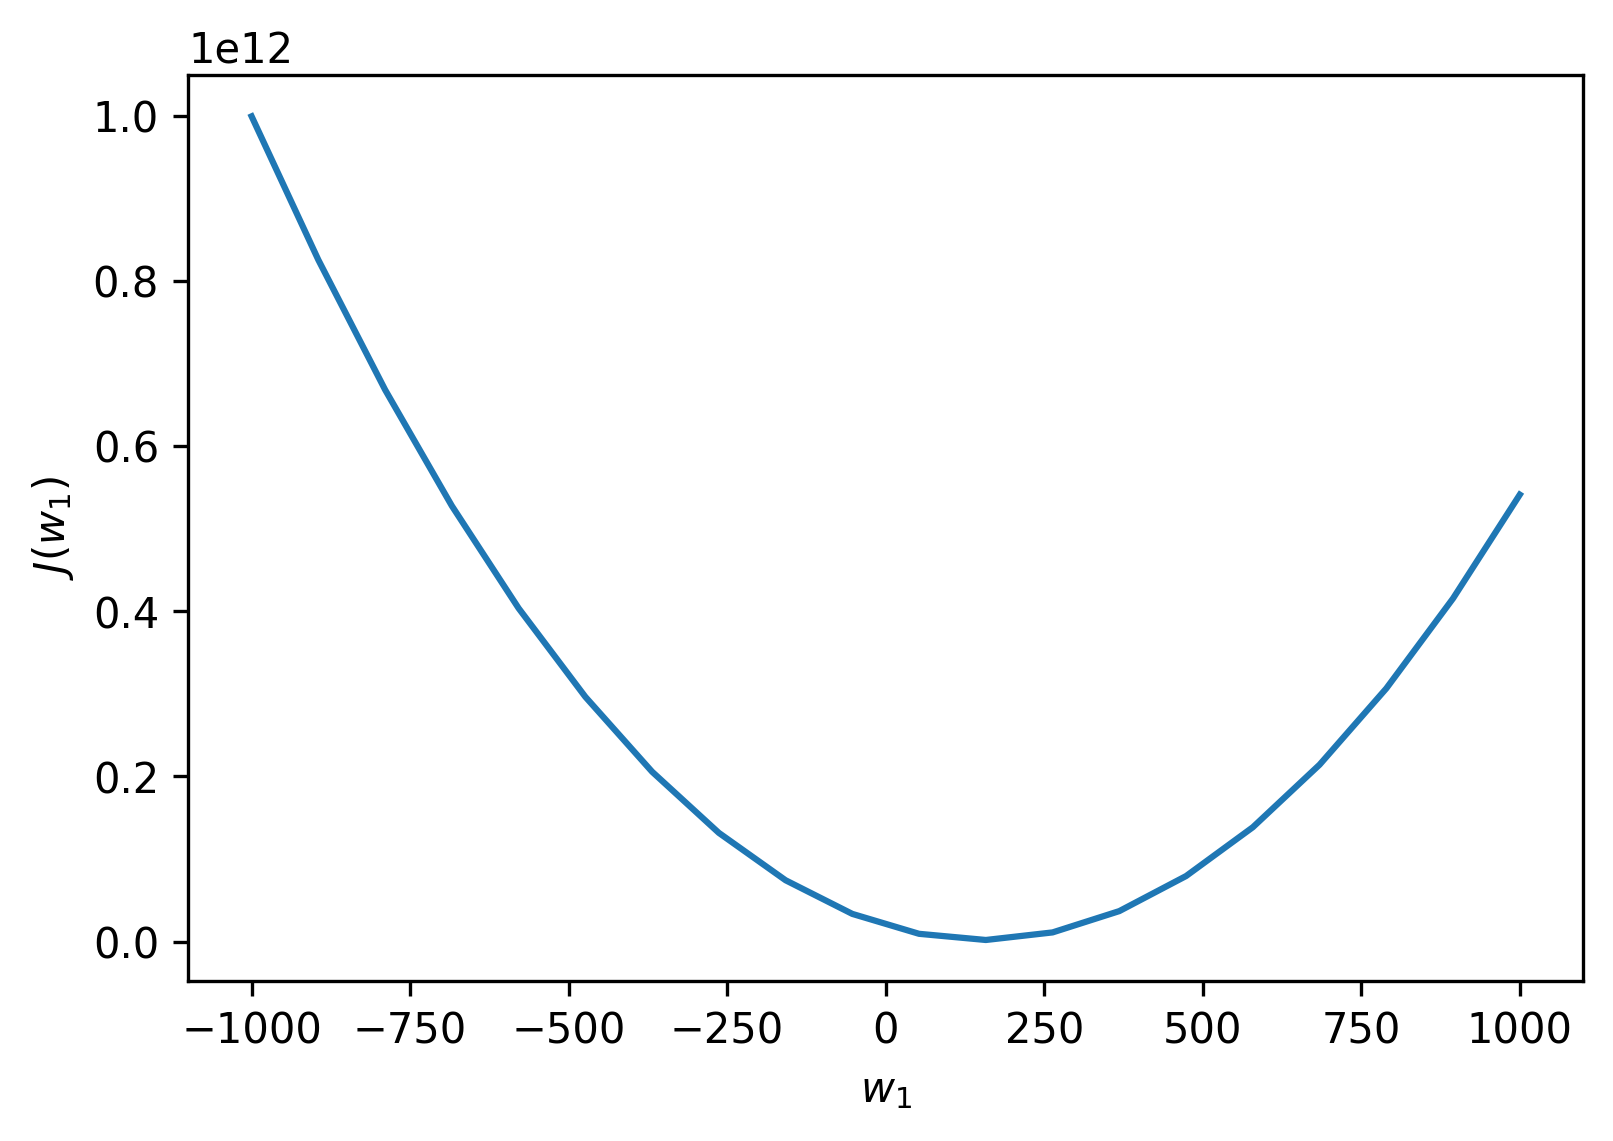

In [20]:
x_train=data['1stFlrSF']
y_train=data['SalePrice']

print(x_train.shape, y_train.shape)

clf=lambda x,w:w*x

def cost(x,w,y_tru):
    sums=0
    for i, xp in enumerate(x):
        p = clf(xp, w) - y_tru[i]
        sums = sums + (p*p)
    return (sums/(2*len(x)))

w = np.linspace(-1000, 1000, 20)
J_w = []
for wp in w:
    J_w.append(cost(x_train, wp, y_train))

plt.figure(dpi=300)
plt.plot(w, J_w)
plt.xlabel(r'$w_1$')
plt.ylabel(r'$J(w_1)$')
plt.savefig('w1_cost_function.png')

In [109]:
clf = lambda x, w: np.dot(w,x)
def cost(x, w, y_tru):
    sums = 0
    for i, xp in enumerate(x):
        p = clf([1, xp], w) - y_tru[i]
        sums = sums + (p * p)
    return (sums / (2 * len(x)))

w = [1000, 1000]
alpha = 0.000001
it = 0
n_iter = 2000
N = float(len(x_train))

w0=[]
w1=[]
costs= []
while (it < n_iter):
    it += 1
    dw0 = 0
    dw1 = 0
    for i, X in enumerate(x_train):
        res = clf([1, X], w) - y_train[i]
        dw0 += res / N
        dw1 += res / N * X
 
    t0 = w[0] - alpha * dw0
    t1 = w[1] - alpha * dw1
    w = [t0, t1]
    w0.append(w[0])
    w1.append(w[1])
    costs.append(cost(x_train, w, y_train))

In [111]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import itertools

kx = np.linspace(500, 1500, 100)
ky = np.linspace(50, 1500, 100)
kz = []
for prod in itertools.product(kx, ky):
    kz.append(cost(x_train, prod, y_train))
assert len(kz) == (len(kx)*len(ky))
kz = np.array(kz)
kz = kz.reshape((len(kx), len(ky)))

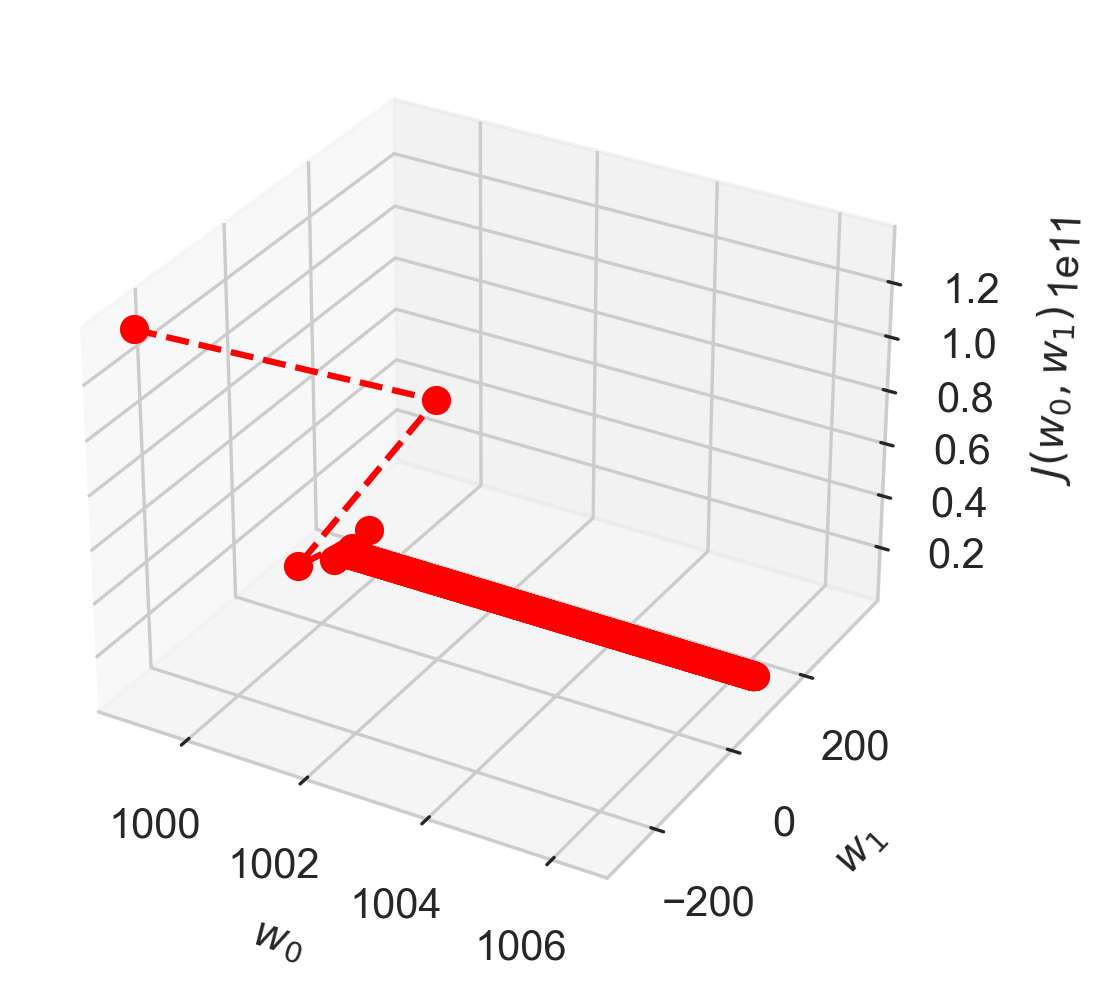

In [113]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
cset = ax.plot(w0, w1, costs, 'ro--')
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel(r'$J(w_0, w_1)$')
ax.xaxis._axinfo['label']['space_factor'] = 2.8
plt.savefig('gradient_descent_search.png')

[1006.3416258335479, 151.73905999832357]
0.34754635157155434


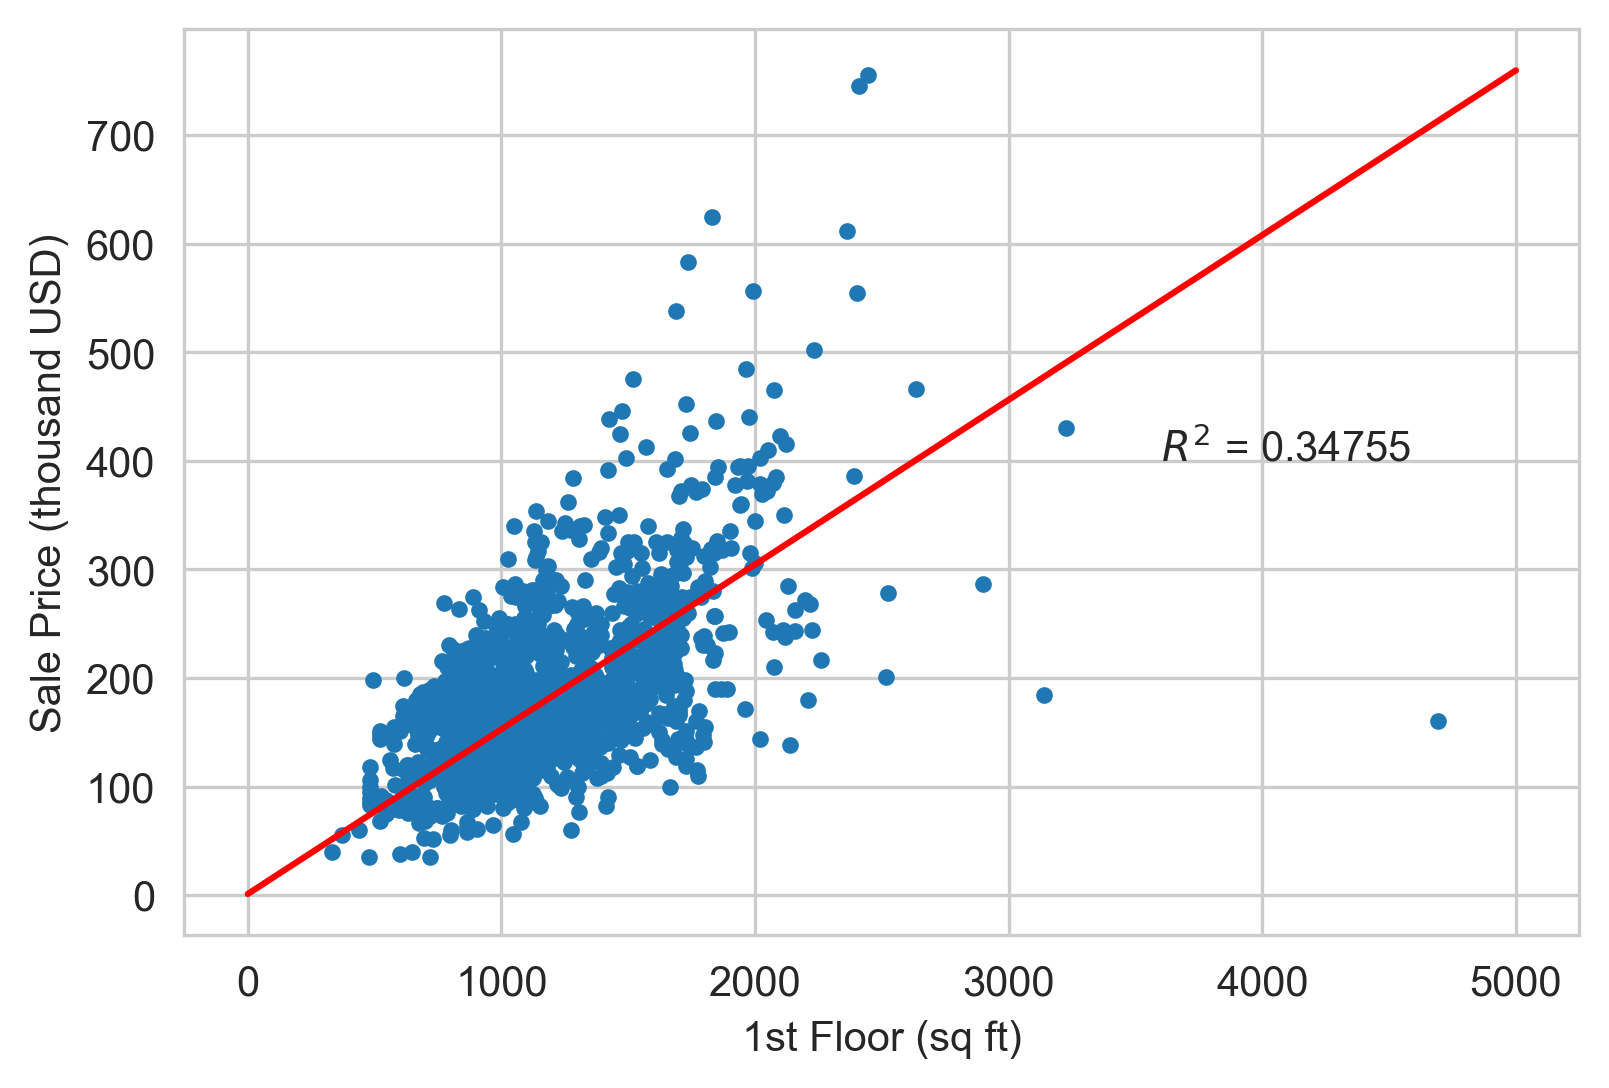

In [115]:
print (w)

y = w[0] + w[1] * x_train
from sklearn.metrics import r2_score
coeff = r2_score(y_train, y)
print (coeff)

xs = np.linspace(0, 5000, 100000)
ys = (w[0] + w[1] * xs) /1000

plt.figure(dpi=300)
plt.plot(data['1stFlrSF'], np.divide(data['SalePrice'], 1000), '.')
plt.plot(xs, ys, 'r')
plt.text(3600, 400, r'$R^2$ = %.5f' % (coeff))
plt.xlabel('1st Floor (sq ft)')
plt.ylabel('Sale Price (thousand USD)')
plt.savefig('house_price_gradient.png')

Logistic Regression

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [39]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train_data = train.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1)
test_data = test.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis = 1)

In [55]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [56]:
test_data.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [57]:
train_data[train_data['Age'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,6,0,3,male,NaN,0,0,8.4583
17,18,1,2,male,NaN,0,0,13.0000
19,20,1,3,female,NaN,0,0,7.2250
26,27,0,3,male,NaN,0,0,7.2250
28,29,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,7.2292
863,864,0,3,female,NaN,8,2,69.5500
868,869,0,3,male,NaN,0,0,9.5000
878,879,0,3,male,NaN,0,0,7.8958


In [58]:
test_data[test_data['Age'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
10,902,3,male,NaN,0,0,7.8958
22,914,1,female,NaN,0,0,31.6833
29,921,3,male,NaN,2,0,21.6792
33,925,3,female,NaN,1,2,23.4500
36,928,3,female,NaN,0,0,8.0500
...,...,...,...,...,...,...,...
408,1300,3,female,NaN,0,0,7.7208
410,1302,3,female,NaN,0,0,7.7500
413,1305,3,male,NaN,0,0,8.0500
416,1308,3,male,NaN,0,0,8.0500


In [77]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace = True)

In [78]:
train_data = train.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis=1)
test_data = test.drop(['Name', 'Ticket', 'Embarked', 'Cabin'], axis=1)

train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)

train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1}).astype(int)

Y_train = train_data["Survived"]
X_train = train_data.drop(["PassengerId", "Survived"], axis=1)

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

print('Accuracy on the training subset : {:.3f}'.format(logreg.score(X_train, Y_train)))

Accuracy on the training subset : 0.798


In [92]:
def sigmoid(scores):
    return 1/(1 + np.exp(-scores))
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(-target * np.log(sigmoid(scores)) - (1 - target) * np.log(1-sigmoid(scores)))/features.shape[0]
    if np.isnan(ll): ll = np.inf
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
    weights = np.zeros(features.shape[1])
    costs = []
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        costs.append(log_likelihood(features,target, weights))
 
    return weights, costs

In [93]:
num_steps = 100000
learning_rate = 5e-7
weights, costs = logistic_regression(np.array(X_train), np.array(Y_train), num_steps, learning_rate)
print('Weights =', weights)

from sklearn.metrics import accuracy_score
Y_pred = []
X = np.array(X_train)
for i in range(len(X)):
        y = 1 if sigmoid(np.dot(X[i], weights)) >= 0.5 else 0
        Y_pred.append(y)
score = accuracy_score(Y_train, Y_pred)
print('Acurracy =', score)

Weights = [ 0.02326331 -1.85601595  0.0040058  -0.25824858 -0.02617678  0.0170121 ]
Acurracy = 0.7912457912457912


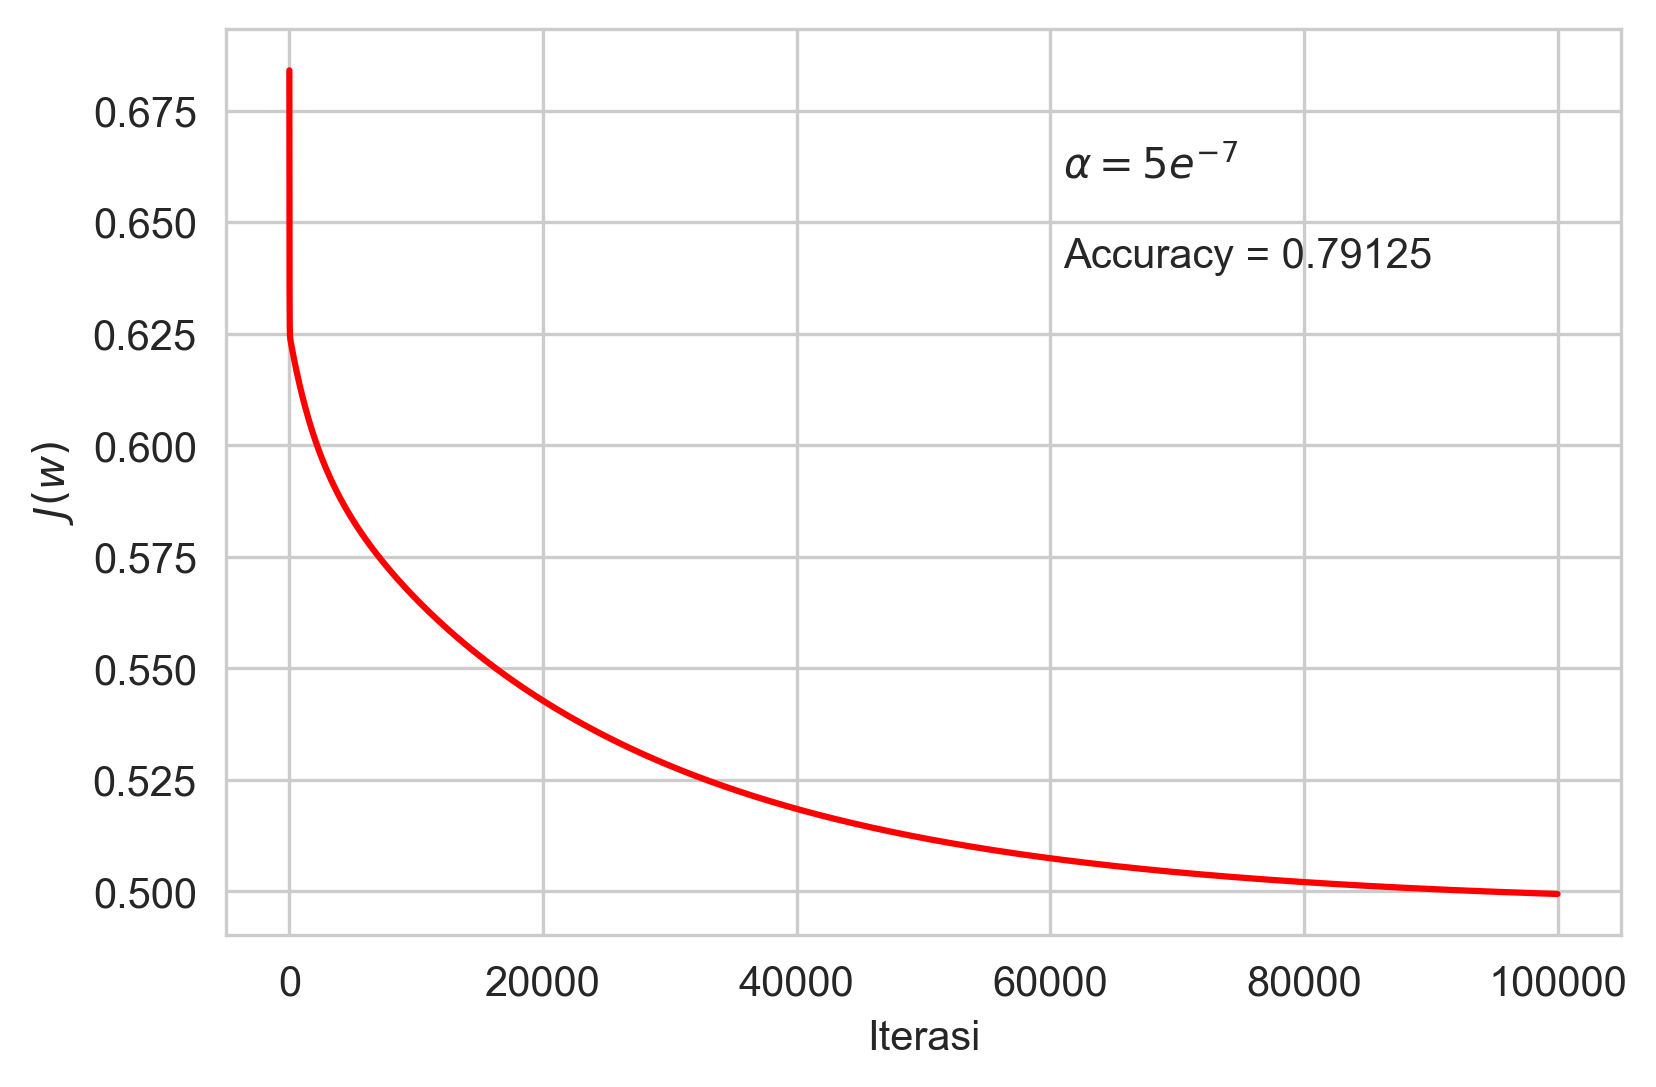

In [94]:
#plot
fig = plt.figure(dpi=300)
plt.plot(range(num_steps), costs, 'r-')
plt.xlabel('Iterasi')
plt.ylabel(r'$J(w)$')
plt.text(61000, 0.66, r'$\alpha=5e^{-7}$')
plt.text(61000, 0.64, r'Accuracy = %.5f' % (score))
plt.savefig('cost_iterasi_logreg_titanic.png')

In [95]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.50000,0,0,7.8292
1,893,3,0,47.00000,1,0,7.0000
2,894,2,1,62.00000,0,0,9.6875
3,895,3,1,27.00000,0,0,8.6625
4,896,3,0,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500
414,1306,1,0,39.00000,0,0,108.9000
415,1307,3,1,38.50000,0,0,7.2500
416,1308,3,1,30.27259,0,0,8.0500


In [99]:
Y_pred = []
X_pred = np.array(test_data.drop(["PassengerId"], axis = 1))
for X in X_pred:
    survived = 1 if sigmoid(np.dot(X, weights)) >= 0.5 else 0
    Y_pred.append(survived)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": Y_pred
})

submission.to_csv('titanic_submission.csv', index=False)